## Using Gradient Descent to bypass dummy variable trap

* When we have dummy variables in our X, and if we didn't cancel one column to avoid dummy variable trap,then we cannot use least square error or maximum likelihood to calculate the weigths(parameters).

* However, we can use gradient descent to help us solve this problem.

### import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Create our data

In [2]:
N = 10
D = 3
X = np.zeros((N, D))
X[:, 0] = 1
X[:5, 1] = 1
X[5:, 2] = 1 
print(X)

[[1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]]


In [3]:
Y = np.array([0] * 5 + [1] * 5)
print(Y)

[0 0 0 0 0 1 1 1 1 1]


### If we try to use Least square error to calculate the weights, there will be an error

In [4]:
w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))

LinAlgError: Singular matrix

# Using gradient descent 

In [6]:
# 1. Create a list to store the cost in each step
costs = []
# 2. initialize random weights(parameters)
w = np.random.randn(D) / np.sqrt(D)
# 3. Set learning rate
learning_rate = 0.001
# 4. Run Gradient Descend
for _ in range(1000):
    Yhat = X.dot(w)
    delta = Yhat - Y
    w = w - learning_rate * X.T.dot(delta)
    mse = delta.dot(delta) / N
    costs.append(mse)

## Plot the costs

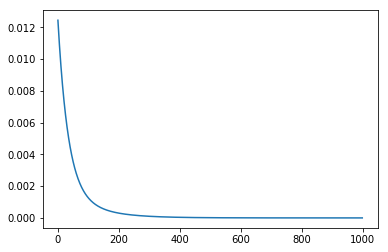

In [7]:
plt.plot(costs)
plt.show()

## Plot Yhat and Y

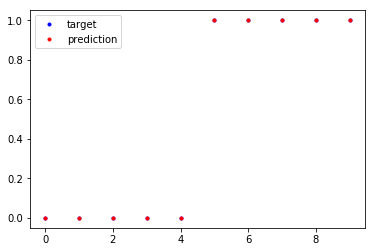

In [10]:
plt.plot(Y, 'b.', label='target')
plt.plot(Yhat, 'r.', label='prediction')
plt.legend()
plt.show()
# The dots are overlapping, which means our model is quite fit to the data.